In [63]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
# Make figures inline and change defualt size 
%pylab inline
pylab.rcParams['figure.figsize'] = 13, 9

Populating the interactive namespace from numpy and matplotlib


In [59]:
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
m = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'l', area_thresh = 500.0,
    llcrnrlon=-125., llcrnrlat=25.,
    urcrnrlon=-60., urcrnrlat=52.)

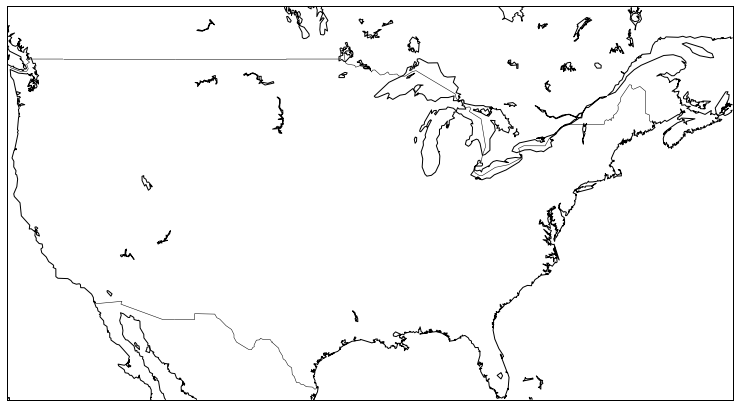

In [62]:
m.drawcoastlines()
m.drawcountries()
#m.fillcontinents(color='gray')
m.drawmapboundary()
lons = range(50)
lats = range(25, 75)
vals = range(50,100)

m.scatter(lons, lats, c=vals, cmap='afmhot')
plt.show()


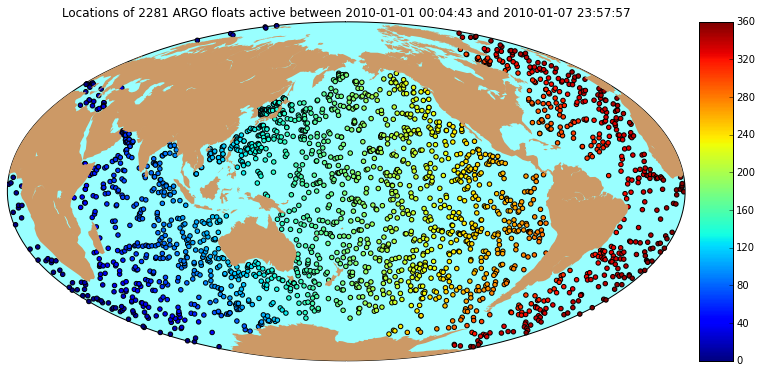

In [64]:
from netCDF4 import Dataset, num2date
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os
# data downloaded from the form at
# http://coastwatch.pfeg.noaa.gov/erddap/tabledap/apdrcArgoAll.html
filename, headers = urllib.urlretrieve('http://coastwatch.pfeg.noaa.gov/erddap/tabledap/apdrcArgoAll.nc?longitude,latitude,time&longitude>=0&longitude<=360&latitude>=-90&latitude<=90&time>=2010-01-01&time<=2010-01-08&distinct()')
dset = Dataset(filename)
lats = dset.variables['latitude'][:]
lons = dset.variables['longitude'][:]
time = dset.variables['time']
times = time[:]
t1 = times.min(); t2 = times.max()
date1 = num2date(t1, units=time.units)
date2 = num2date(t2, units=time.units)
dset.close()
os.remove(filename)
# draw map with markers for float locations
m = Basemap(projection='hammer',lon_0=180)
x, y = m(lons,lats)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,marker='o', c=lons)
m.colorbar()
plt.title('Locations of %s ARGO floats active between %s and %s' %\
        (len(lats),date1,date2),fontsize=12)
plt.show()


Use the best of the code from above to make a plot of the stations

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


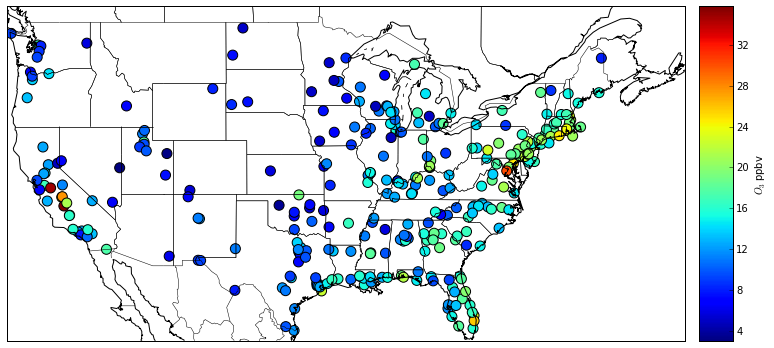

In [96]:
import numpy as np
import pylab as pl
# First load the ozone effect data from the shared summary data output by R/createHealthSummary.R
df = np.loadtxt('/Users/sbrey/Google Drive/CSU_research/PM25Ozone/sharedData/summary_df_python.csv',
                dtype = 'str', delimiter =",", skiprows = 1, comments=None)

# Get rid of R NA becuase they feak python out
NAMask = df == 'NA'
df[NAMask] = nan

# Get all the data relative to plotting the effect of smoke on ozone distributions
effect = np.array(df[:,10], dtype='float')
significant = np.array(df[:,11], dtype='float')
lat = np.array(df[:,2], dtype='float')
lon = np.array(df[:,3], dtype='float')

# Reduce all these arrays to only those where the effect is significant
effect = effect[significant == 1.]
lats    = lat[significant == 1.]
lons    = lon[significant == 1.]

x, y = m(lons,lats)

# Now get the plot set up
from mpl_toolkits.basemap import Basemap, cm
%pylab inline
pylab.rcParams['figure.figsize'] = 13, 9

# create figure and axes instances
pl.figure()

m = Basemap(projection='merc', lat_0=0, lon_0=0,
    resolution = 'l', area_thresh=10000,
    llcrnrlon=-125., llcrnrlat=25.,
    urcrnrlon=-60., urcrnrlat=50.)

# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()

m.scatter(x,y,marker='o', c=effect, s=100)
m.colorbar(label="$O_{3}$ ppbv ", size="5%")
savefig('mapChangeSmokeColorbar_python.pdf')